<a href="https://colab.research.google.com/github/Sevanip/Python-Data201/blob/main/NYPD_Shooting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Who are most at risk of becoming victims of a shooting incident in NYC?

#Importing Libraries

In [1]:
#here i am importing the libraries i may want to use for this analysis.
import numpy as np # to perform mathematical operations
import pandas as pd #To analysiing, cleaning, manipulating and exploring the data
import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns #To explore and understand the data and for visualizations.
%matplotlib inline

#Exploring the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sevanip/Python-Data201/main/NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:
df.shape #this tells me how many row and columns are in this dataset. we have 25596 rows and 19 columns.

(25596, 19)

In [4]:
df.head(10) # Note: statistical_murder_flag - true means victim died while false means victim survived.

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236168668,11/11/2021,15:04:00,BROOKLYN,79,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,996313.0,187499.0,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008)
1,231008085,07/16/2021,22:05:00,BROOKLYN,72,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,981845.0,171118.0,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005)
2,230717903,07/11/2021,01:09:00,BROOKLYN,79,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,996546.0,187436.0,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005)
3,237712309,12/11/2021,13:42:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1001139.0,192775.0,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003)
4,224465521,02/16/2021,20:00:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1050710.0,184826.0,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008)
5,228252164,05/15/2021,04:13:00,QUEENS,113,0.0,NaN,True,NaN,NaN,NaN,25-44,M,BLACK,1051329.0,196646.0,40.706179,-73.758061,POINT (-73.75806147399999 40.70617856900003)
6,226950018,04/14/2021,21:08:00,BRONX,42,0.0,COMMERCIAL BLDG,True,NaN,NaN,NaN,18-24,M,BLACK,1009489.0,243050.0,40.833764,-73.908795,POINT (-73.90879517699994 40.83376365400005)
7,237710987,12/10/2021,19:30:00,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1017440.0,256046.0,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
8,224701998,02/22/2021,00:18:00,MANHATTAN,34,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1005426.0,254690.0,40.865723,-73.923441,POINT (-73.92344088699997 40.86572268100008)
9,225295736,03/07/2021,06:15:00,BROOKLYN,75,0.0,NaN,True,25-44,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,1020492.0,187865.0,40.682257,-73.869331,POINT (-73.86933111399996 40.68225681500007)


#Data Cleaning

In [5]:
df.isnull().sum() #checking for missing values, however i won't be removing any. Since my analysis mostly revolves around victims i and not overly concerned about the perp missing data.

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
Lon_Lat                        0
dtype: int64

In [6]:
df['INCIDENT_KEY'].is_unique #I did some reading and learned that if there were multiple victims the duplicate incident keys were produced. 

False

In [7]:
#how many incidents included multiple victims. I think it is important to know how many incidents were duplicate because it tells us that there weren't acctually 25596 incidents it was less, there were maybe
#22861, if the duplicates were only doubles. that number would change if there were maybe 3, 4, 5 victims in one incident. 25596 IS THE TOTAL # VICTIMS BUT NOT THE TOTAL NUMBER OF INCIDENTS. 
newcols = []
duplist = []

for i in df.INCIDENT_KEY:
  if i not in newcols:
    newcols.append(i)
  else:
    duplist.append(i)

print('list of duplicates', len(duplist))


list of duplicates 5470


In [8]:
print(df.columns) #displaying column names, since i will be dropping some of them and it is easier to just copy and paste.

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat'],
      dtype='object')


##Dropping Columns, df.drop

In [9]:
drop_cols = ['X_COORD_CD', 'Y_COORD_CD', 'Lon_Lat', 'Latitude', 'Longitude', 'PRECINCT'] #dropping the columns i don't need or won't be using in this analysis.
df.drop(drop_cols, inplace = True, axis=1)

In [10]:
#checking value counts for a few columns.
df['PERP_RACE'].value_counts() #even though i won't be using perp data much in my analysis i did want to see if the data in this case is similar to other crime data i have looked at. And Blacks are at the top which is similar.
#This tells me that the area with most shooting incidents will probably be predominantly black neighborhoods. 

BLACK                             10668
WHITE HISPANIC                     2164
UNKNOWN                            1836
BLACK HISPANIC                     1203
WHITE                               272
ASIAN / PACIFIC ISLANDER            141
AMERICAN INDIAN/ALASKAN NATIVE        2
Name: PERP_RACE, dtype: int64

In [11]:
df['STATISTICAL_MURDER_FLAG'].value_counts() #checking the actual numbers of how many victims survived and how many didn't. it good to know that most shooting incidents don't result in someone dying. 

False    20668
True      4928
Name: STATISTICAL_MURDER_FLAG, dtype: int64

##Manipulating date & time

In [12]:
import datetime #to manipulate date and time, i want to pull out the month and year separately so we can see 1. what time of year shooting incidents increase and decrease, 2. if there is any pattern over the years.

In [13]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])#converting dates from mm/dd/yyyy format to yyyy-mm-dd

In [14]:
df['MONTH'] = pd.DatetimeIndex(df['OCCUR_DATE']).month #adding a new column called Month
df['YEAR'] = pd.DatetimeIndex(df['OCCUR_DATE']).year #adding a new column called YEAR

In [15]:
df.head() #checking to see that the new columns were successfully added.

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH,YEAR
0,236168668,2021-11-11,15:04:00,BROOKLYN,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,11,2021
1,231008085,2021-07-16,22:05:00,BROOKLYN,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,7,2021
2,230717903,2021-07-11,01:09:00,BROOKLYN,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,7,2021
3,237712309,2021-12-11,13:42:00,BROOKLYN,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,12,2021
4,224465521,2021-02-16,20:00:00,QUEENS,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,2,2021


In [16]:
df.MONTH.value_counts() #checking the # of shooting incidents per month. 


7     3009
8     3002
6     2657
9     2416
5     2401
10    2176
12    1894
11    1843
4     1828
1     1600
3     1532
2     1238
Name: MONTH, dtype: int64

In [17]:
df.YEAR.value_counts() #checking the # of shooting incidents per year.

2006    2055
2021    2011
2008    1959
2020    1948
2011    1939
2010    1912
2007    1887
2009    1828
2012    1717
2014    1464
2015    1434
2013    1339
2016    1208
2017     970
2019     967
2018     958
Name: YEAR, dtype: int64

##get_dummies function

In [18]:
"""The get_dummies function is used to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.
The get_dummies function works as follows:
It takes a data frame, series, or list.
Then, it converts each unique element present in the object to a column heading.
The function iterates over the object that is passed and checks if the element at the particular index matches the column heading.
If it does, it encodes it as a 1.
Otherwise, it assigns it a 0.
-found this explanation on educative.io website.
 """

'The get_dummies function is used to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.\nThe get_dummies function works as follows:\nIt takes a data frame, series, or list.\nThen, it converts each unique element present in the object to a column heading.\nThe function iterates over the object that is passed and checks if the element at the particular index matches the column heading.\nIf it does, it encodes it as a 1.\nOtherwise, it assigns it a 0.\n-found this explanation on educative.io website.\n '

In [19]:
dummy = pd.get_dummies(df['STATISTICAL_MURDER_FLAG']) 

In [20]:
dummy.head()

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
df2 = pd.concat((df,dummy), axis=1) #combining df with the dummy variable using concat function

In [22]:
df2.head() #checking that the concat worked.

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH,YEAR,False,True
0,236168668,2021-11-11,15:04:00,BROOKLYN,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,11,2021,1,0
1,231008085,2021-07-16,22:05:00,BROOKLYN,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,7,2021,1,0
2,230717903,2021-07-11,01:09:00,BROOKLYN,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,7,2021,1,0
3,237712309,2021-12-11,13:42:00,BROOKLYN,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,12,2021,1,0
4,224465521,2021-02-16,20:00:00,QUEENS,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,2,2021,1,0


In [23]:
df2 = df2.drop(['STATISTICAL_MURDER_FLAG', True], axis = 1) #dropping the columns i no longer need while retaining the one i need. 

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25596 entries, 0 to 25595
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   INCIDENT_KEY       25596 non-null  int64         
 1   OCCUR_DATE         25596 non-null  datetime64[ns]
 2   OCCUR_TIME         25596 non-null  object        
 3   BORO               25596 non-null  object        
 4   JURISDICTION_CODE  25594 non-null  float64       
 5   LOCATION_DESC      10619 non-null  object        
 6   PERP_AGE_GROUP     16252 non-null  object        
 7   PERP_SEX           16286 non-null  object        
 8   PERP_RACE          16286 non-null  object        
 9   VIC_AGE_GROUP      25596 non-null  object        
 10  VIC_SEX            25596 non-null  object        
 11  VIC_RACE           25596 non-null  object        
 12  MONTH              25596 non-null  int64         
 13  YEAR               25596 non-null  int64         
 14  False 

In [25]:
df2.head(10)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,LOCATION_DESC,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH,YEAR,False
0,236168668,2021-11-11,15:04:00,BROOKLYN,0.0,NaN,NaN,NaN,NaN,18-24,M,BLACK,11,2021,1
1,231008085,2021-07-16,22:05:00,BROOKLYN,0.0,NaN,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,7,2021,1
2,230717903,2021-07-11,01:09:00,BROOKLYN,0.0,NaN,<18,M,BLACK,25-44,M,BLACK,7,2021,1
3,237712309,2021-12-11,13:42:00,BROOKLYN,0.0,NaN,NaN,NaN,NaN,25-44,M,BLACK,12,2021,1
4,224465521,2021-02-16,20:00:00,QUEENS,0.0,NaN,NaN,NaN,NaN,25-44,M,BLACK,2,2021,1
5,228252164,2021-05-15,04:13:00,QUEENS,0.0,NaN,NaN,NaN,NaN,25-44,M,BLACK,5,2021,0
6,226950018,2021-04-14,21:08:00,BRONX,0.0,COMMERCIAL BLDG,NaN,NaN,NaN,18-24,M,BLACK,4,2021,0
7,237710987,2021-12-10,19:30:00,BRONX,0.0,NaN,NaN,NaN,NaN,25-44,M,BLACK,12,2021,1
8,224701998,2021-02-22,00:18:00,MANHATTAN,0.0,NaN,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,2,2021,1
9,225295736,2021-03-07,06:15:00,BROOKLYN,0.0,NaN,25-44,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,3,2021,0


In [26]:
df2.rename(columns={False:'Survived'}, inplace=True)#renaming my new column

In [27]:
print(df2.columns)

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'JURISDICTION_CODE',
       'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'MONTH', 'YEAR', 'Survived'],
      dtype='object')


##Reordering Columns

In [28]:
new_columns = ['OCCUR_DATE', 'MONTH', 'YEAR', 'OCCUR_TIME', 'BORO', 'LOCATION_DESC', 'Survived', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
                'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'JURISDICTION_CODE']
df2 = df2[new_columns]

In [29]:
df2.head()

,OCCUR_DATE,MONTH,YEAR,OCCUR_TIME,BORO,LOCATION_DESC,Survived,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,JURISDICTION_CODE
0,2021-11-11,11,2021,15:04:00,BROOKLYN,NaN,1,NaN,NaN,NaN,18-24,M,BLACK,0.0
1,2021-07-16,7,2021,22:05:00,BROOKLYN,NaN,1,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,0.0
2,2021-07-11,7,2021,01:09:00,BROOKLYN,NaN,1,<18,M,BLACK,25-44,M,BLACK,0.0
3,2021-12-11,12,2021,13:42:00,BROOKLYN,NaN,1,NaN,NaN,NaN,25-44,M,BLACK,0.0
4,2021-02-16,2,2021,20:00:00,QUEENS,NaN,1,NaN,NaN,NaN,25-44,M,BLACK,0.0


"""In this section i did quite a number of things in order to clean and manipulate the data. First i checked for missing data, i quickly realized that i won't be removing those since i may want to use it in my analysis. 
I ended up not really using it but i'm still okay with keeping it. Then i checked to see if the arrest_key column were all unique values, i saw it wasn't. I didn't understand why that was like that so i went back to the data 
source and found out that if there were multiple victims the duplicate incident keys were produced. Now i wanted to see how many incidents were duplicate or how many incidents had multiple victims and found so i used a 
for loop and found that 5470 of the incidents had multiple victims. Once that was done i decided to drop the columns i don't plan on using (df.drop). Then i imported to datetime module so i can convert the date column
and then i can pull out the year and month into two separate columns, which i would then be able to use in my analysis. the next thing i did was use the get_dummies function to convert a the column STATISTICAL_MURDER_FLAG
to binary. This makes it easier for me to use it in my analysis. I renamed that column 'Survived'. Lastly in my data cleaning process i reordered my column to the way i would like to see it.
  """

#Visualization

##Time, Month & Year of shooting incidents

In [31]:
df2.OCCUR_TIME.value_counts().iloc[:20] #time of day most shooting incident occured

23:30:00    171
00:30:00    151
01:30:00    147
02:00:00    142
21:00:00    138
22:30:00    132
01:00:00    129
04:00:00    128
23:00:00    126
21:30:00    124
22:00:00    113
02:30:00    105
00:50:00    104
03:30:00     98
03:00:00     97
04:30:00     96
01:15:00     96
23:50:00     93
20:00:00     93
23:15:00     90
Name: OCCUR_TIME, dtype: int64

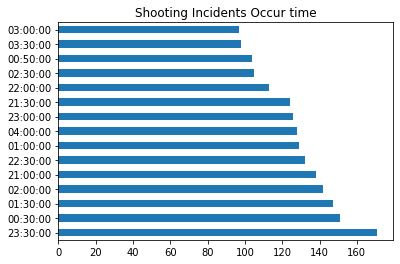

In [32]:
df2.OCCUR_TIME.value_counts().iloc[:15].plot(kind='barh', title = 'Shooting Incidents Occur time')

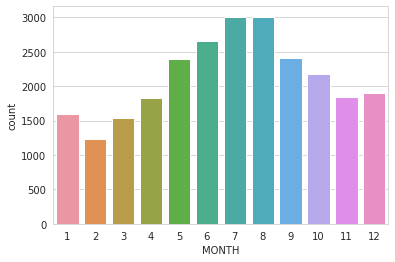

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='MONTH', data=df2)

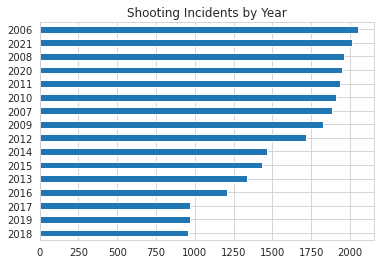

In [34]:
sns.set_style('whitegrid')
df2.YEAR.value_counts().sort_values().plot(kind='barh', title = 'Shooting Incidents by Year')

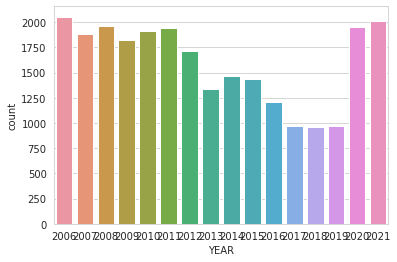

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='YEAR', data=df2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


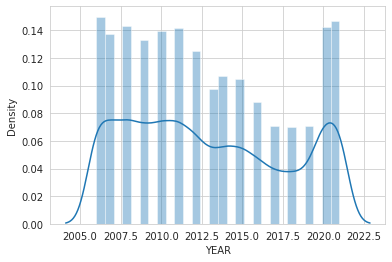

In [36]:
sns.distplot(df2['YEAR'])

##Graph - victims who survived vs who didn't

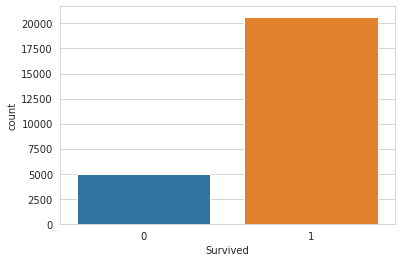

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df2)

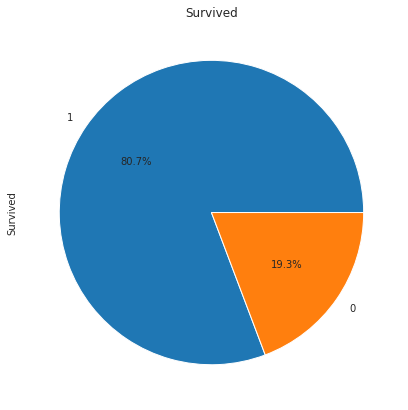

In [38]:
df2.Survived.value_counts().plot(kind='pie', title = 'Survived', autopct='%1.1f%%', figsize=(7,7))

In [39]:
df2.Survived.value_counts()

1    20668
0     4928
Name: Survived, dtype: int64

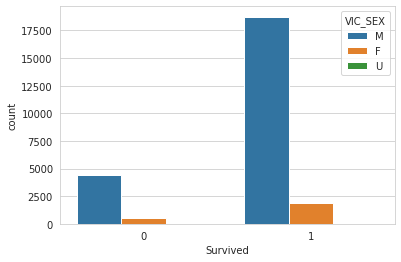

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='VIC_SEX', data=df2)

In [41]:
df2.VIC_SEX.value_counts()

M    23182
F     2403
U       11
Name: VIC_SEX, dtype: int64

##Number of Victims who survive vs didn't by boro

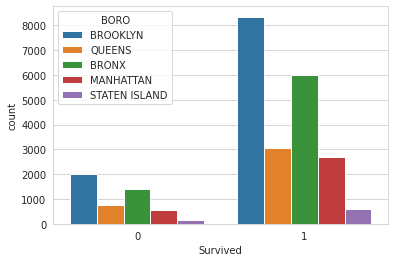

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='BORO', data=df2)

## Number of Victims by Race

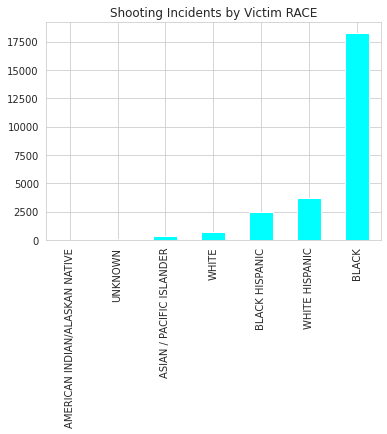

In [42]:
df2.VIC_RACE.value_counts().sort_values().plot(kind='bar', title = 'Shooting Incidents by Victim RACE', color='cyan')

## Number of Victims by Age Group

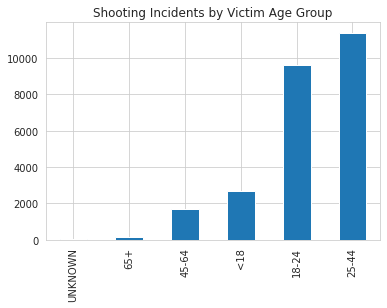

In [43]:
df2.VIC_AGE_GROUP.value_counts().sort_values().plot(kind='bar', title = 'Shooting Incidents by Victim Age Group')

## Victims by Location

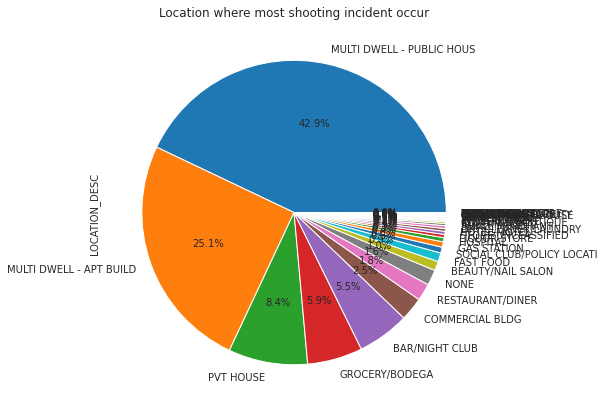

In [44]:
df2.LOCATION_DESC.value_counts().plot(kind='pie', title = 'Location where most shooting incident occur', autopct='%1.1f%%', figsize=(7,7))

"""In the visualization section i was ready to see the data with a better view. I wanted to find out who are most likely to be a victim of a shooting incident. To do that i needed to see victims age, race, location
where incidents happen, boro, the time of year incidents happen mostly and even time of day.

In conclusion i found that those who are most likely to be involved in a shooting incident are: african america/black, who are between the ages of 18-24 and 25-44, male, lives or spend more time in brooklyn and live or 
spend more time in a multi dwelling public housing. Someone who is mostly awake in the late nights and early mornings, and someone who most definitely will spend all of july and august in NYC. 

Most shooting incidents occured in Multi dwelling public housing and apt building and private houses. This tells me that these incidents mostly happen among people who know each other either personally or by some other means. 
Home is suppose to be a place we go to to feel safe, however this analysis tells me that we need to be more cautious at home. 

In the year 2017, 2018 & 2019 shooting incident rates were below 1000 incidents, over a decade of shooting incidents decreasing was reversed in 2020 the height of the pandemic when that number
increase 100% to a whopping 1948 and in 2021 increased again to 2011 shooting incidents.

Most shooting incidents occurs late at night and early morning. Incidents increase during summer months and tends to be lower in the winter and colder months. 


 """

#Additional Information

In [ ]:
"""in this section i wanted to see if there is any simialarity or difference in in the location where shooting incidents occur pre-covid and during covid. """

In [49]:
df_2020 = df2.loc[df2['YEAR'] == 2020] #During Covid

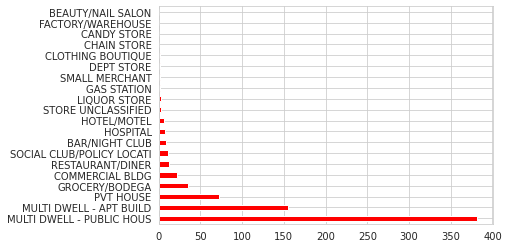

In [50]:
df_2020.LOCATION_DESC.value_counts().plot(kind="barh", color="red")

In [51]:
df_2007 = df2.loc[df2['YEAR'] == 2007] #Pre-Covid

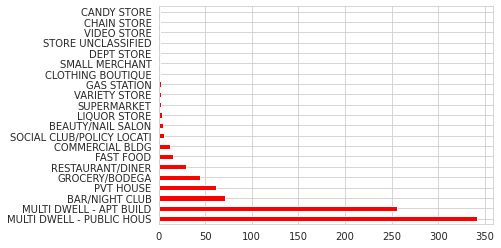

In [52]:
df_2007.LOCATION_DESC.value_counts().plot(kind="barh", color="red")

#More Additional Info

In [53]:
df2.BORO.value_counts() # population of each boro BRONX = 1,424,948, BROOKLYN = 2,641,052 MANHATTAN = 1,576,875 QUEENS = 2,331,143 STATEN ISLAND = 493,494

BROOKLYN         10365
BRONX             7402
QUEENS            3828
MANHATTAN         3265
STATEN ISLAND      736
Name: BORO, dtype: int64

In [ ]:
#i wanted to see what was the % of the population of each boro involved in a shooting incident. 

In [54]:
perBxSh = (7402/1424948)*100
perBklnSh = (10365/2641052)*100
perQnsSh = (3828/2331143)*100
perMnhSh = (3265/1576875)*100
perSISh = (736/493494)*100

In [55]:
perBxSh #.52%

0.5194575521352358

In [56]:
perBklnSh #.39%

0.3924572480965918

In [57]:
perMnhSh #.21%

0.20705509314308362

In [58]:
perQnsSh #.16%

0.16421129034126178

In [59]:
perSISh #.15%

0.14914061771774326

#References

##https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8 - data source
##http://www.citypopulation.de/en/usa/newyorkcity/ - use to find out the population for each boro